# Dog & Cat classification Model Using Transfer Learning efficieantNetB0 Use

* **Data Provide by kaggle download link is** : https://www.kaggle.com/datasets/chetankv/dogs-cats-images

In [2]:
# halper file call in my github
# !wget "https://raw.githubusercontent.com/iamzen24/course_project/main/halper_function.py"

--2022-05-04 12:01:10--  https://raw.githubusercontent.com/iamzen24/course_project/main/halper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10235 (10.0K) [text/plain]
Saving to: ‘halper_function.py’

halper_function.py  100%[===================>]  10.00K  --.-KB/s    in 0s      

2022-05-04 12:01:10 (85.3 MB/s) - ‘halper_function.py’ saved [10235/10235]



In [32]:
import tensorflow as tf
import tensorflow_hub as hub
from halper_function import create_tensorboard_callback,load_and_prep_image,pred_and_plot,plot_loss_curves
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
EPOCHS = 5

In [13]:
# Frist step check how many image have each directory
import os
for dirpath ,dirname,filename in os.walk("drive/MyDrive/DogCatVision/"):
    print(f"There are {len(dirname)} of directory and {len(filename)} image in '{dirpath}' ")

There are 2 of directory and 0 image in 'drive/MyDrive/DogCatVision/' 
There are 2 of directory and 0 image in 'drive/MyDrive/DogCatVision/training_set' 
There are 0 of directory and 1116 image in 'drive/MyDrive/DogCatVision/training_set/cats' 
There are 0 of directory and 1258 image in 'drive/MyDrive/DogCatVision/training_set/dogs' 
There are 2 of directory and 0 image in 'drive/MyDrive/DogCatVision/test_set' 
There are 0 of directory and 256 image in 'drive/MyDrive/DogCatVision/test_set/cats' 
There are 0 of directory and 256 image in 'drive/MyDrive/DogCatVision/test_set/dogs' 


In [17]:
# class name get and store
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("drive/MyDrive/DogCatVision/training_set") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cats' 'dogs']


## Preprocess our data using Tensorflow ImageDataGenerator 

In [14]:
# setup directory 
train_dir = "drive/MyDrive/DogCatVision/training_set/"
test_dir = "drive/MyDrive/DogCatVision/test_set/"

# model url set
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1"

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training Data......")
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")
print("Testing Data......")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                        target_size=IMAGE_SHAPE,
                                        batch_size=BATCH_SIZE,
                                        class_mode="categorical")



Training Data......
Found 2374 images belonging to 2 classes.
Testing Data......
Found 512 images belonging to 2 classes.


## Create The model Dog And Cat vision

In [28]:
# butiful function create transfer learning  feature extraction model
def create_model(model_url,output_name= "softmax",num_classes=10):
    """
    Takes a Tensorflow hub pretrain model url create squeantial model with it.
    Args:
      model_url: Tensorflow hub model url
      num_classses: How many classes you problem specefic

    return: sequeantial model without compile 
    """
    th_model = hub.KerasLayer(handle=model_url,
                              trainable=False,
                              name="feature_extraction",
                              input_shape=IMAGE_SHAPE + (3,))
    model = tf.keras.Sequential([
         th_model,
         tf.keras.layers.Dense(num_classes,activation=output_name,name="output_layer")
    ])

    return model

In [29]:
# create the model
# setup random seed
tf.random.set_seed(42)
dog_cat_model = create_model(model_url=efficientnet_url,output_name="softmax",num_classes=train_data.num_classes)

# 2. compile the model
dog_cat_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
# 3. fit the model
efficient_net_history = dog_cat_model.fit(train_data,
                                          epochs=EPOCHS,
                                          steps_per_epoch=len(train_data),
                                          validation_data=test_data,
                                          validation_steps=len(test_data),
                                          callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                                 experiment_name="efficient_netB0")])

Saving TensorBoard log files to: tensorflow_hub/efficient_netB0/20220504-130814
Epoch 1/5
75/75 [==============================] - 161s 2s/step - loss: 0.6707 - accuracy: 0.8332 - val_loss: 0.6528 - val_accuracy: 0.9219
Epoch 2/5
75/75 [==============================] - 18s 245ms/step - loss: 0.6319 - accuracy: 0.9503 - val_loss: 0.6169 - val_accuracy: 0.9375
Epoch 3/5
75/75 [==============================] - 19s 247ms/step - loss: 0.5961 - accuracy: 0.9566 - val_loss: 0.5836 - val_accuracy: 0.9492
Epoch 4/5
75/75 [==============================] - 18s 245ms/step - loss: 0.5631 - accuracy: 0.9612 - val_loss: 0.5526 - val_accuracy: 0.9492
Epoch 5/5
75/75 [==============================] - 18s 245ms/step - loss: 0.5328 - accuracy: 0.9629 - val_loss: 0.5238 - val_accuracy: 0.9512


## Evaluate model 

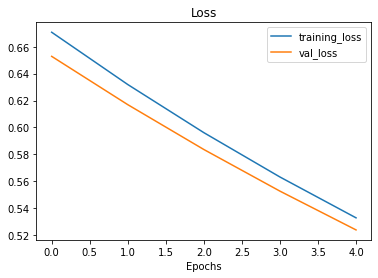

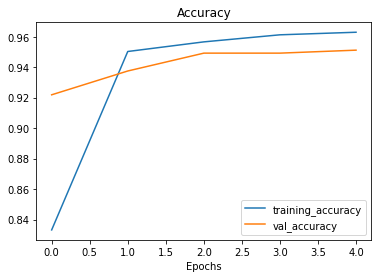

In [33]:
plot_loss_curves(efficient_net_history)

## custom image model Predication check

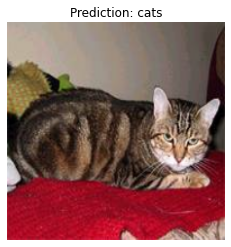

In [36]:
pred_and_plot(model=dog_cat_model,filename="drive/MyDrive/DogCatPredicationImage/cat1.jpg",class_names=class_names)

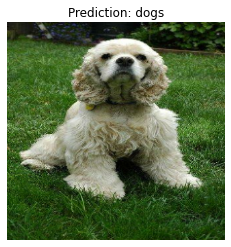

In [38]:
# one more predication our model hooooo eaaaaaa...
pred_and_plot(model=dog_cat_model,filename="drive/MyDrive/DogCatPredicationImage/dog1.jpg",class_names=class_names)

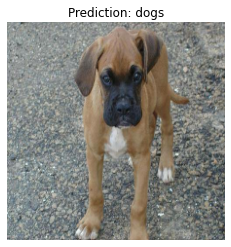

In [39]:
pred_and_plot(model=dog_cat_model,filename="drive/MyDrive/DogCatPredicationImage/dog2.jpg",class_names=class_names)

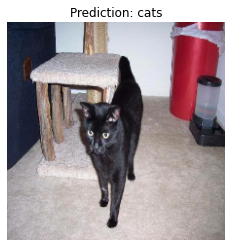

In [58]:
pred_and_plot(model=dog_cat_model,filename="drive/MyDrive/DogCatPredicationImage/cat2.jpg",class_names=class_names)

 Above code one function created one time than call every time predication and image show And this time you see manualy line by line predication process.
 

In [54]:
image = load_and_prep_image(filename="drive/MyDrive/DogCatPredicationImage/cat2.jpg")
image.shape

TensorShape([224, 224, 3])

In [55]:
y_prob = dog_cat_model.predict(tf.expand_dims(image,axis=0))
y_prob

array([[0.5063031, 0.4936969]], dtype=float32)

Text(0.5, 1.0, 'model Predication : cats')

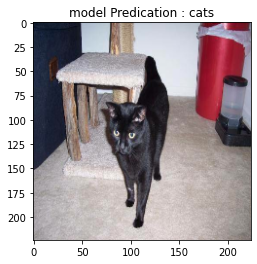

In [61]:
import matplotlib.pyplot as plt
pred_class = class_names[y_prob.argmax()]
plt.imshow(image)
plt.title(f"model Predication : {pred_class}")

## Save And Load  model 

In [62]:
# save model
dog_cat_model.save("Dog&CatPredict")

INFO:tensorflow:Assets written to: Dog&CatPredict/assets


INFO:tensorflow:Assets written to: Dog&CatPredict/assets


In [64]:
# Load model chack model is same as save model
load_model = tf.keras.models.load_model("Dog&CatPredict")
load_model.evaluate(test_data)

16/16 [==============================] - 6s 216ms/step - loss: 0.5238 - accuracy: 0.9512


[0.5237997174263, 0.951171875]

In [65]:
# not save model evaluate 
dog_cat_model.evaluate(test_data)

16/16 [==============================] - 4s 213ms/step - loss: 0.5238 - accuracy: 0.9512


[0.5237997174263, 0.951171875]